In [53]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-05-03 23:23:43--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.2’

sarcasm.json.2      100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-05-03 23:23:43 (139 MB/s) - ‘sarcasm.json.2’ saved [5643545/5643545]



In [79]:
import json 

with open("sarcasm.json", 'r') as f:
  dataset = json.load(f)

sentences = []
labels = []

for item in dataset:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [80]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

In [81]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [82]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [88]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 30)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 160,541
Trainable params: 160,541
Non-trainable params: 0
________________________________________________

In [89]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5631 - accuracy: 0.6935 - val_loss: 0.3963 - val_accuracy: 0.8348 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3143 - accuracy: 0.8721 - val_loss: 0.3436 - val_accuracy: 0.8568 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2378 - accuracy: 0.9080 - val_loss: 0.3472 - val_accuracy: 0.8529 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1903 - accuracy: 0.9282 - val_loss: 0.3699 - val_accuracy: 0.8515 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.1575 - accuracy: 0.9420 - val_loss: 0.4038 - val_accuracy: 0.8495 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1352 - accuracy: 0.9518 - val_loss: 0.4706 - val_accuracy: 0.8319 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1132 - accuracy: 0.9599 - val_loss: 0.4901 - val_accuracy: 0.8410 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0996 - accuracy: 0.9664 - val_loss: 0.5289 - val_accuracy: 0.8389 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

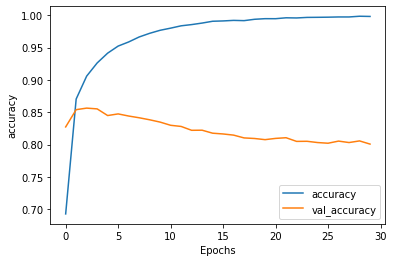

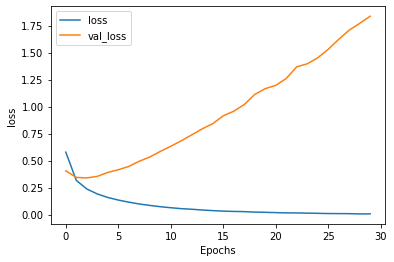

In [86]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [96]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word
print(reverse_word_index)

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

{1: '<OOV>', 2: 'to', 3: 'of', 4: 'the', 5: 'in', 6: 'for', 7: 'a', 8: 'on', 9: 'and', 10: 'with', 11: 'is', 12: 'new', 13: 'trump', 14: 'man', 15: 'from', 16: 'at', 17: 'about', 18: 'you', 19: 'by', 20: 'this', 21: 'after', 22: 'be', 23: 'up', 24: 'out', 25: 'that', 26: 'how', 27: 'as', 28: 'it', 29: 'not', 30: 'are', 31: 'your', 32: 'what', 33: 'his', 34: 'all', 35: 'he', 36: 'will', 37: 'who', 38: 'just', 39: 'has', 40: 'more', 41: 'one', 42: 'year', 43: 'into', 44: 'report', 45: 'have', 46: 'why', 47: 'over', 48: 'area', 49: 'u', 50: 'donald', 51: 'says', 52: 'day', 53: 'can', 54: 's', 55: 'first', 56: 'woman', 57: 'time', 58: 'like', 59: 'get', 60: 'old', 61: 'no', 62: 'her', 63: "trump's", 64: 'off', 65: 'now', 66: 'an', 67: 'obama', 68: 'life', 69: 'people', 70: 'women', 71: 'house', 72: "'", 73: 'was', 74: 'still', 75: 'white', 76: 'back', 77: 'make', 78: 'than', 79: 'clinton', 80: 'down', 81: 'when', 82: 'my', 83: '5', 84: 'could', 85: 'world', 86: 'americans', 87: 'if', 88: '

In [102]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [103]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>